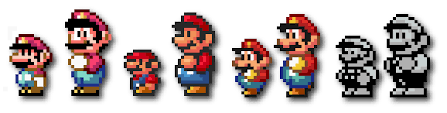

## Introduction: Integrated Project
Ice is a company that globally sells video games. This project aims to look at data about these video games on behalf of Ice to determine which games are deemed successful. 

This will be done by:
1. Preparing the data and making it ready for analysis
2. Comparing different trends in sales and how factors such as game reviews, ratings, and gaming systems might impact their success.
3. Determining a proper metric for success of different video games

This information will be useful to the Ice Company in determinging upcoming marketing strategies.

## Prepare the Data

In [1]:
# Loading all the libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import plotly.express as px

In [2]:
#import data set
games = pd.read_csv('/datasets/games.csv')
display(games)
display(games.info())

Name Platform  Year_of_Release         Genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16711               LMA Manager 2007     X360           2006.0        Sports   
16712        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16713               Spirits & Spells      GBA           2003.0      Platform   
16714            Winning Post 8 2016      PSV           2016.0    Simulation   

       NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score  \
0         41.36     28.96      3.77         8.45          76.0          8   
1         29.08      3.58      6.81         0.77           NaN        NaN   
2         15.68     12.76      3.79         3.29          82.0        8.3   
3         15.61     10.93      3.28         2.95          80.0          8   
4         11.27      8.89     10.22         1.00           NaN        NaN   
...         ...       ...       ...          ...           ...        ...   
16710      0.00      0.00      0.01         0.00           NaN        NaN   
16711      0.00      0.01      0.00         0.00           NaN        NaN   
16712      0.00      0.00      0.01         0.00           NaN        NaN   
16713      0.01      0.00      0.00         0.00           NaN        NaN   
16714      0.00      0.00      0.01         0.00           NaN        NaN   

      Rating  
0          E  
1        NaN  
2          E  
3          E  
4        NaN  
...      ...  
16710    NaN  
16711    NaN  
16712    NaN  
16713    NaN  
16714    NaN  

[16715 rows x 11 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

In [3]:
#makes titles lowercase
def convert_title_to_lowercase(df):
    df.columns = df.columns.str.lower()
    return df
games = convert_title_to_lowercase(games)

#make all the writing lower case to avoid confusion
def convert_to_lowercase(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            if df[column].str.contains('[A-Z]').any():
                df[column] = df[column].str.lower()
    return df
games = convert_to_lowercase(games)
display(games)


name platform  year_of_release         genre  \
0                         wii sports      wii           2006.0        sports   
1                  super mario bros.      nes           1985.0      platform   
2                     mario kart wii      wii           2008.0        racing   
3                  wii sports resort      wii           2009.0        sports   
4           pokemon red/pokemon blue       gb           1996.0  role-playing   
...                              ...      ...              ...           ...   
16710  samurai warriors: sanada maru      ps3           2016.0        action   
16711               lma manager 2007     x360           2006.0        sports   
16712        haitaka no psychedelica      psv           2016.0     adventure   
16713               spirits & spells      gba           2003.0      platform   
16714            winning post 8 2016      psv           2016.0    simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score user_score  \
0         41.36     28.96      3.77         8.45          76.0          8   
1         29.08      3.58      6.81         0.77           NaN        NaN   
2         15.68     12.76      3.79         3.29          82.0        8.3   
3         15.61     10.93      3.28         2.95          80.0          8   
4         11.27      8.89     10.22         1.00           NaN        NaN   
...         ...       ...       ...          ...           ...        ...   
16710      0.00      0.00      0.01         0.00           NaN        NaN   
16711      0.00      0.01      0.00         0.00           NaN        NaN   
16712      0.00      0.00      0.01         0.00           NaN        NaN   
16713      0.01      0.00      0.00         0.00           NaN        NaN   
16714      0.00      0.00      0.01         0.00           NaN        NaN   

      rating  
0          e  
1        NaN  
2          e  
3          e  
4        NaN  
...      ...  
16710    NaN  
16711    NaN  
16712    NaN  
16713    NaN  
16714    NaN  

[16715 rows x 11 columns]

In [4]:
#check for duplicates and drop any if they exist
print(games.duplicated().sum())
#no rows duplicated in full

0


In [5]:
#convert data to required data types
#convert user_score to float type
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')
#change year of release to datetime
games['year_of_release'] = pd.to_datetime(games['year_of_release'], format = '%Y')
display(games.info())
                                          

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16713 non-null  object        
 1   platform         16715 non-null  object        
 2   year_of_release  16446 non-null  datetime64[ns]
 3   genre            16713 non-null  object        
 4   na_sales         16715 non-null  float64       
 5   eu_sales         16715 non-null  float64       
 6   jp_sales         16715 non-null  float64       
 7   other_sales      16715 non-null  float64       
 8   critic_score     8137 non-null   float64       
 9   user_score       7590 non-null   float64       
 10  rating           9949 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 1.4+ MB


None

--> Why were the columns' data types changed?

I changed the user_score to float type. I decided to do this to make future calculation on this possible. As thia is a quantitative measures of data, I would like the ability to extrapolate values from it such as the mean. This is not possible with object type data. 

I also converted the year_of_release column to datetime to make potential data manipulations regarding times of release easier.

In [6]:
#Identify and replace missing values
#missing values in name column (object)
display(games[games['name'].isna()])
games = games.dropna(subset=['name']).reset_index()

display(games.info())

name platform year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      gen      1993-01-01   NaN      1.78      0.53      0.00   
14244  NaN      gen      1993-01-01   NaN      0.00      0.00      0.03   

       other_sales  critic_score  user_score rating  
659           0.08           NaN         NaN    NaN  
14244         0.00           NaN         NaN    NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   index            16713 non-null  int64         
 1   name             16713 non-null  object        
 2   platform         16713 non-null  object        
 3   year_of_release  16444 non-null  datetime64[ns]
 4   genre            16713 non-null  object        
 5   na_sales         16713 non-null  float64       
 6   eu_sales         16713 non-null  float64       
 7   jp_sales         16713 non-null  float64       
 8   other_sales      16713 non-null  float64       
 9   critic_score     8137 non-null   float64       
 10  user_score       7590 non-null   float64       
 11  rating           9949 non-null   object        
dtypes: datetime64[ns](1), float64(6), int64(1), object(4)
memory usage: 1.5+ MB


None

--> How did I deal with missing values (look at the documentation for specifics)

For the missing name values, i decided to drop both of those rows. I thought this made the most sense as they were missing genre data, user_score, and critic_score data and represent a very small portion of the overall data set. I do not believe their removal will skew the data so far as to make our results innaccurate.

For the missing year of release dates, They are filled with "NaT" values signifying that a time is not available. Seeing as a mean or median do not make sense for this value and it is in my opinion too large a subset to drop it, I am going to leave it as is.


The critic score, user score, and rating are all missing large sections of data in this set. For both the score values, filling in the mean or median does not seem to make sense as all video games scores are based on audience preference and not on any sort of continuum. 

The rating also cannot be filled in with any numerical value, but also represents a large chunk of the data set. Without researching each rating indivodually which is not time efficient, it does not make sense to do anything except ensure that they are properly labelled as missing.


In [7]:
#create separate column with total sales for each game
games['total_sales'] = games['na_sales']+ games['eu_sales']+ games['jp_sales']

## Step 3: Analyze Data

In [8]:
#Look at how many games were released in different years. Is the data for every period significant?
games['year'] = games['year_of_release'].dt.year
#groupby by year
games_year = games.groupby('year').size().reset_index(name='count')
#sort results in descending order
games_year= games_year.sort_values(by='count', ascending=False)

display(games_year.head(10))

print(games_year['count'].sum())



year  count
28  2008.0   1427
29  2009.0   1426
30  2010.0   1255
27  2007.0   1197
31  2011.0   1136
26  2006.0   1006
25  2005.0    939
22  2002.0    829
23  2003.0    775
24  2004.0    762

16444


In [9]:
#create a bar graph counting the number of games released per year 
fig = px.bar(games_year, x='year', y='count', title='games v year')
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='games',
    title_font=dict(family="Arial", size=24, color="black"),
    font=dict(family="Arial", size=14, color="black") )
fig.update_layout(
    xaxis=dict(
        tickmode='linear',
        dtick=10
    )
)
fig.update_layout(
    yaxis=dict(
        tickmode='linear',
        dtick=500
    )
)
fig.show()

For the games in which the year of release is provided, it seems that the number of video games released increases signifigantly from 1994 and onwards. I would focus on games released in this time period, as it represents a bulk of the data. 

In [10]:
#group games by platform and summarize the total sales for each platform
platform_sum = games.groupby('platform')['total_sales'].sum()
platform_sum= platform_sum.sort_values(ascending=False)
display(platform_sum)

platform
ps2     1062.33
x360     885.66
wii      828.44
ps3      803.97
ds       746.86
ps       689.95
gba      310.12
ps4      265.79
psp      252.63
xb       249.02
gb       247.26
nes      245.74
3ds      245.64
pc       237.14
n64      214.30
snes     196.82
gc       193.75
xone     145.05
2600      96.07
wiiu      76.24
psv       47.61
sat       33.52
gen       27.46
dc        15.68
scd        1.81
ng         1.44
ws         1.42
tg16       0.16
3do        0.10
gg         0.04
pcfx       0.03
Name: total_sales, dtype: float64

year
2000.0     35.59
2001.0    149.65
2002.0    183.66
2003.0    163.62
2004.0    171.96
2005.0    141.51
2006.0     89.18
2007.0     52.30
2008.0     34.59
2009.0     16.24
2010.0      4.44
2011.0      0.35
Name: total_sales, dtype: float64

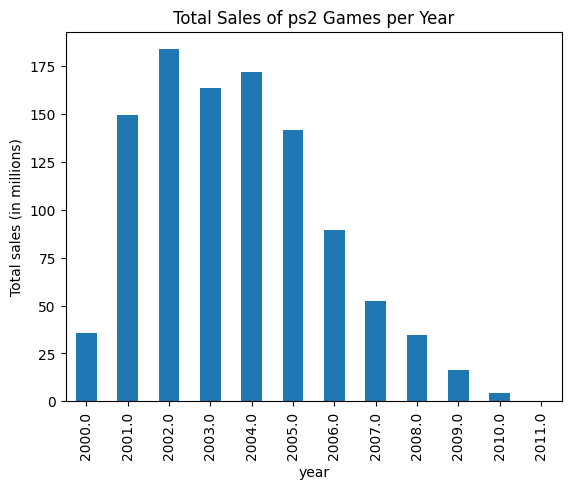

In [11]:
#Choose the platforms with the greatest total sales and build a distribution (of total sales?) based on data for each year.
ps2_sales = games[games['platform']=='ps2']
ps2_sum = ps2_sales.groupby('year')['total_sales'].sum()
display(ps2_sum)
ps2_sum.plot(kind='bar', x='year', title='Total Sales of ps2 Games per Year', ylabel='Total sales (in millions)')
plt.show()

In [12]:
#Find platforms that used to be popular but now have zero sales. 
# Group by year and platform to calculate total sales for each platform per year
sales_per_platform_per_year = games.groupby(['year', 'platform'], as_index=False)['total_sales'].sum()
display(sales_per_platform_per_year)
# Create the stacked bar chart
fig = px.bar(sales_per_platform_per_year, 
             x='year', 
             y='total_sales', 
             color='platform', 
             title='Total Sales per Year by Platform',
             labels={'year': 'Year', 'total_sales': 'Total Sales (in millions)', 'platform': 'Platform'},
             barmode='stack',  # Stacked bar chart to show proportions
             height=500,
             color_discrete_map={'nes': 'black'})

# Show the plot
fig.show()


year platform  total_sales
0    1980.0     2600        11.26
1    1981.0     2600        35.36
2    1982.0     2600        28.57
3    1983.0     2600         5.78
4    1983.0      nes        10.88
..      ...      ...          ...
233  2016.0      psv         4.10
234  2016.0      wii         0.17
235  2016.0     wiiu         4.25
236  2016.0     x360         1.40
237  2016.0     xone        23.91

[238 rows x 3 columns]

Sales varied from platform to platform with PS2 sales being the highest. Other PS systems such as the PS and PS3 also yielded high sales along with the Wii, nintendo DS, and X-box 360. The pcfx yieled the lowest number of sales from this data set. 

PS2 game sales lasted from 2000-2011 and grossed the highest number of sales worldwide. Sales peaked at both 2002 and 2004.

There are many platforms that used to be popular and have faded over time such as NES, PS2, DS, PS, and the Wii. The popularity of platforms generally lasts about 5 years.

I will be looking at data from the five previous years. As systems tend to trend in popularity for about 5 years, I want to look at the newer systems that will be trending in the coming 2-3 years. 

Looking at 2011-2016, we can see many prominent trends in profits for each gaming system type. While the PS3 and XBox360 both made up a majority of sales in 2011, their numbers went down over time. This is not atypical however as sales have generally been decreasing in this time. The PS4 Wiiu, PS5, and Xone came out in this time, and saw some growth before decreasing again in sales. I will be focusing on these newer games as they are currently the more profitable and more likely to have a growth trajectory based on how long systems remain popular. 

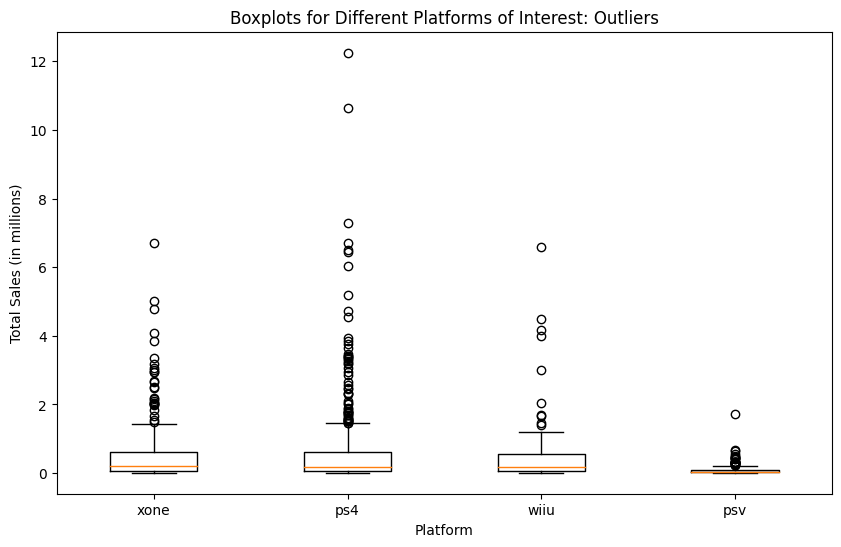

In [13]:
#build a boxplot for global sales of all games broken down by platform
#isolate data where the year is 2013 and onward
games =games.query('year >= 2013')
#isolate platforms of interest
games_xone = games[games['platform']=='xone']
games_ps4 = games[games['platform']=='ps4']
games_wiiu = games[games['platform']=='wiiu']
games_psv = games[games['platform']=='psv']

#combine for boxplot
data_for_boxplot = [games_xone['total_sales'], games_ps4['total_sales'], games_wiiu['total_sales'], games_psv['total_sales']]

#create boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(data_for_boxplot, labels=['xone', 'ps4', 'wiiu', 'psv'])
plt.title('Boxplots for Different Platforms of Interest: Outliers')
plt.xlabel('Platform')
plt.ylabel('Total Sales (in millions)')

plt.show()

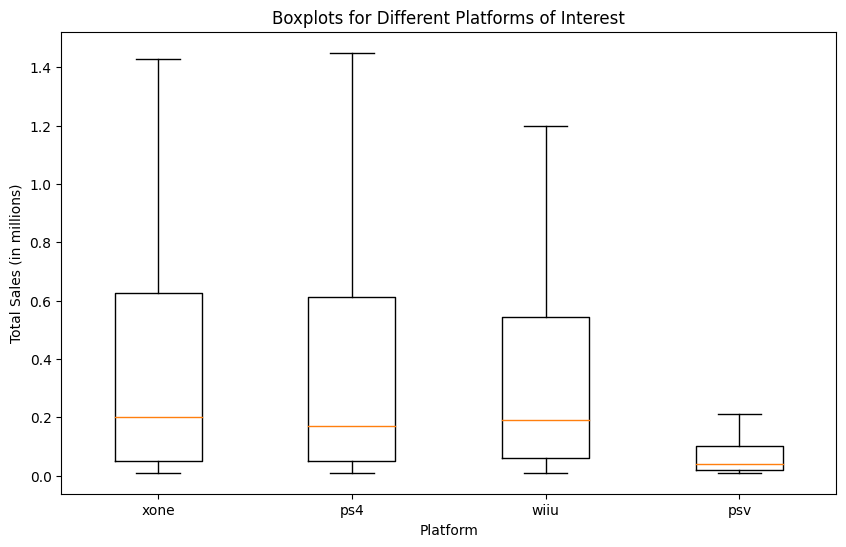

In [14]:
#build a boxplot for global sales of all games broken down by platform: remove outliers.
#create boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(data_for_boxplot, labels=['xone', 'ps4', 'wiiu', 'psv'], showfliers= False)
plt.title('Boxplots for Different Platforms of Interest')
plt.xlabel('Platform')
plt.ylabel('Total Sales (in millions)')


plt.show()

Are the differences in sales significant? What about average sales on various platforms? Describe your findings.

By looking at these graphs, it seems that while the median values for xone, ps4, and wiiu are similar with PS4 slightly lower than the other two, the spread of the data is different. The PSV is the most notably different than the other three. The range of data for the PSV is smaller and the outliers produced lower sales. The XOne and ps4 have noticably higher maximum sales than the other two platforms and larger spread of data above the median (larger IQR). This aligns with our previous generalization on timeline, as these are the youngest platforms and still on their potential rise to popularity. 

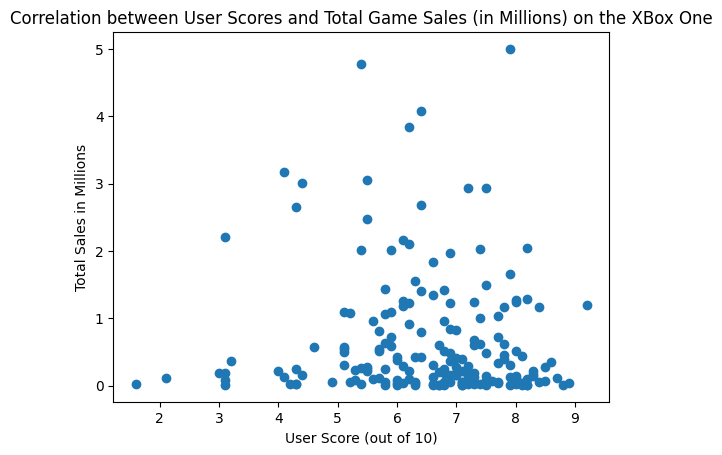

The correlation coefficient for the user score and total sales in the xone gaming system is -0.069.


In [15]:
#make a scatter plot for the Xone system to show the user scores and total sales correlation
plt.scatter(games_xone['user_score'], games_xone['total_sales'])
plt.title('Correlation between User Scores and Total Game Sales (in Millions) on the XBox One')
plt.xlabel('User Score (out of 10)')
plt.ylabel('Total Sales in Millions')
plt.show()

#calculate correlation coefficient
xone_corr = games_xone['user_score'].corr(games_xone['total_sales'])
print(f"The correlation coefficient for the user score and total sales in the xone gaming system is {xone_corr:.2}.")

This graph shows the correlation between user scores and total sales for games on the Xone system. There is no strong correlation between the two. The correlation coefficient is a small negative number showing a negative correlation. However because this number is small, there is not enough evidence here to suggest that the user score has a strong impact on total sales. 

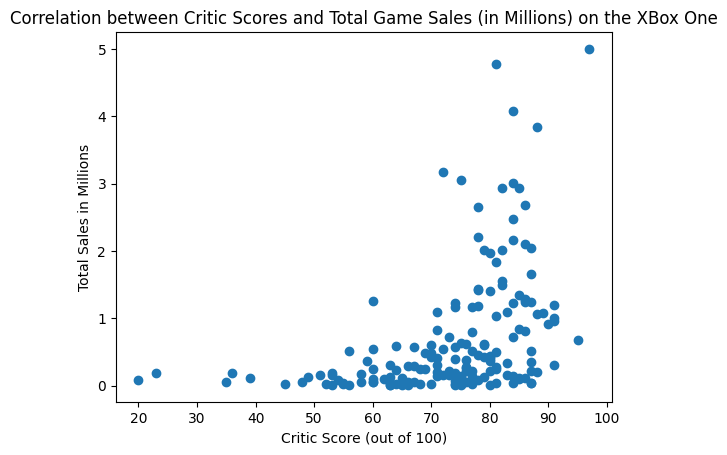

The correlation coefficient for the critic score and total sales in the xone gaming system is 0.42.


In [16]:
#make a scatter plot for the Xone system to show the critic scores and total sales correlation
plt.scatter(games_xone['critic_score'], games_xone['total_sales'])
plt.title('Correlation between Critic Scores and Total Game Sales (in Millions) on the XBox One')
plt.xlabel('Critic Score (out of 100)')
plt.ylabel('Total Sales in Millions')
plt.show()

#calculate correlation coefficient
xone_corr = games_xone['critic_score'].corr(games_xone['total_sales'])
print(f"The correlation coefficient for the critic score and total sales in the xone gaming system is {xone_corr:.2}.")

This graph shows the correlation between critic scores and total sales for games on the Xone system. There is a moderate positive correlation between critic score and total sales. While this is not extremely strong, it is stronger than the correlation between sales and user scores and seems to suggest that higher critic scores may improve sales.

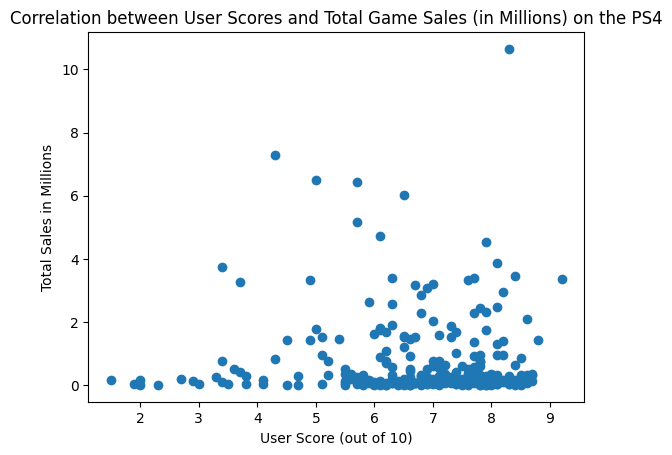

The correlation coefficient for the user score and total sales in the ps4 gaming system is -0.031.


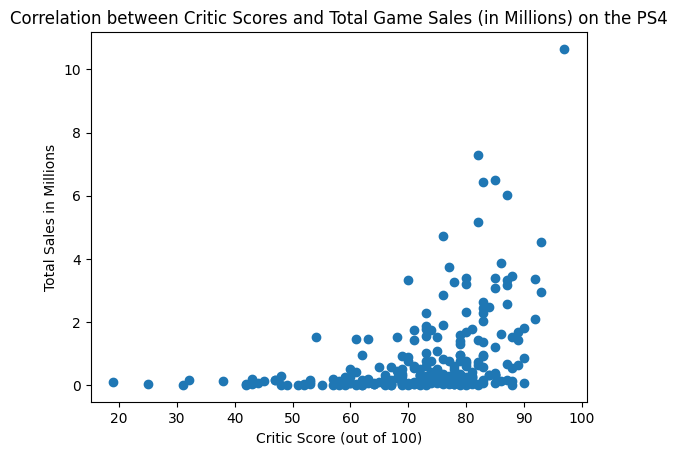

The correlation coefficient for the critic score and total sales in the PS4 gaming system is 0.41.


In [17]:
#make a scatter plot for the ps4 system to show the user scores and total sales correlation
plt.scatter(games_ps4['user_score'], games_ps4['total_sales'])
plt.title('Correlation between User Scores and Total Game Sales (in Millions) on the PS4')
plt.xlabel('User Score (out of 10)')
plt.ylabel('Total Sales in Millions')
plt.show()

#calculate correlation coefficient
ps4_corr = games_ps4['user_score'].corr(games_ps4['total_sales'])
print(f"The correlation coefficient for the user score and total sales in the ps4 gaming system is {ps4_corr:.2}.")

#make a scatter plot for the PS4 system to show the critic scores and total sales correlation
plt.scatter(games_ps4['critic_score'], games_ps4['total_sales'])
plt.title('Correlation between Critic Scores and Total Game Sales (in Millions) on the PS4')
plt.xlabel('Critic Score (out of 100)')
plt.ylabel('Total Sales in Millions')
plt.show()

#calculate correlation coefficient
ps4_corr = games_ps4['critic_score'].corr(games_ps4['total_sales'])
print(f"The correlation coefficient for the critic score and total sales in the PS4 gaming system is {ps4_corr:.2}.")

This graph shows the correlation between user scores and total sales for games on the PS4 system. There is no strong correlation between the two. The correlation coefficient is a small negative number showing a negative correlation. However because this number is small, there is not enough evidence here to suggest that the user score has a strong impact on total sales. 

This graph shows the correlation between critic scores and total sales for games on the PS4 system. There is a moderate positive correlation between critic score and total sales. While this is not extremely strong, it is stronger than the correlation between sales and user scores and seems to suggest that higher critic scores may improve sales.

Seeing these trends across multiple different platforms strengthens these patterns between user and critic scores and total sales.

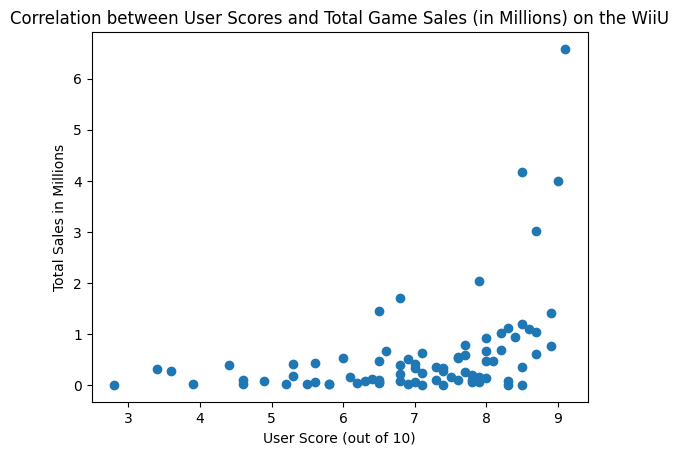

The correlation coefficient for the user score and total sales in the WiiU gaming system is 0.42.


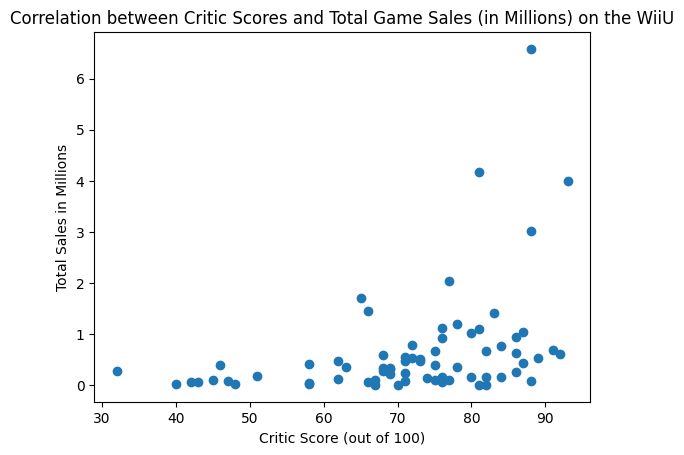

The correlation coefficient for the critic score and total sales in the WiiU gaming system is 0.37.


In [18]:
#####wiiu


#make a scatter plot for the ps4 system to show the user scores and total sales correlation
plt.scatter(games_wiiu['user_score'], games_wiiu['total_sales'])
plt.title('Correlation between User Scores and Total Game Sales (in Millions) on the WiiU')
plt.xlabel('User Score (out of 10)')
plt.ylabel('Total Sales in Millions')
plt.show()

#calculate correlation coefficient
wiiu_corr = games_wiiu['user_score'].corr(games_wiiu['total_sales'])
print(f"The correlation coefficient for the user score and total sales in the WiiU gaming system is {wiiu_corr:.2}.")

#make a scatter plot for the Wiiu system to show the critic scores and total sales correlation
plt.scatter(games_wiiu['critic_score'], games_wiiu['total_sales'])
plt.title('Correlation between Critic Scores and Total Game Sales (in Millions) on the WiiU')
plt.xlabel('Critic Score (out of 100)')
plt.ylabel('Total Sales in Millions')
plt.show()

#calculate correlation coefficient
wiiu_corr = games_wiiu['critic_score'].corr(games_wiiu['total_sales'])
print(f"The correlation coefficient for the critic score and total sales in the WiiU gaming system is {wiiu_corr:.2}.")

This graph shows the correlation between user scores and total sales for games on the WiiU system. There is a moderate positive correlation between critic score and total sales. While this is not extremely strong, it seems to suggest that higher user scores may improve sales.

This graph shows the correlation between critic scores and total sales for games on the WiiU system. There is a moderate positive correlation between critic score and total sales. While this is not extremely strong, it seems to suggest that higher critic scores may improve sales.

Seeing these trends across multiple different platforms strengthens these patterns between user and critic scores and total sales.

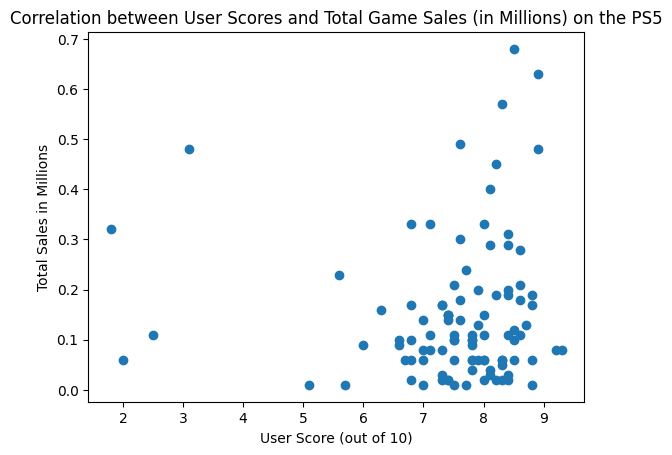

The correlation coefficient for the user score and total sales in the ps4 gaming system is 0.03.


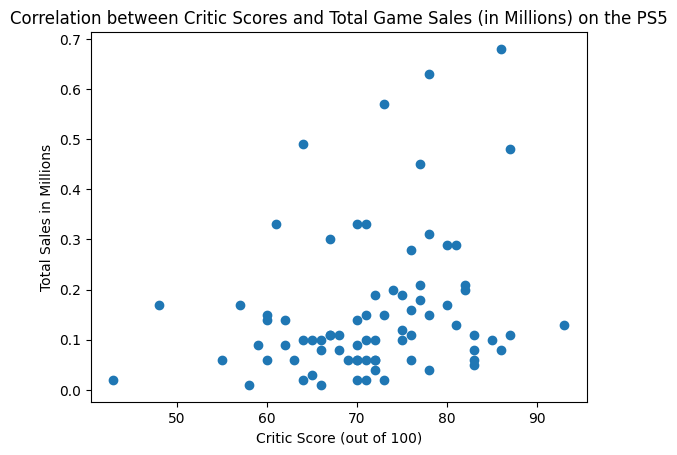

The correlation coefficient for the critic score and total sales in the PS5 gaming system is 0.26.


In [19]:

######PS5
#make a scatter plot for the ps5 system to show the user scores and total sales correlation
plt.scatter(games_psv['user_score'], games_psv['total_sales'])
plt.title('Correlation between User Scores and Total Game Sales (in Millions) on the PS5')
plt.xlabel('User Score (out of 10)')
plt.ylabel('Total Sales in Millions')
plt.show()

#calculate correlation coefficient
psv_corr = games_psv['user_score'].corr(games_psv['total_sales'])
print(f"The correlation coefficient for the user score and total sales in the ps4 gaming system is {psv_corr:.2}.")

#make a scatter plot for the PS5 system to show the critic scores and total sales correlation
plt.scatter(games_psv['critic_score'], games_psv['total_sales'])
plt.title('Correlation between Critic Scores and Total Game Sales (in Millions) on the PS5')
plt.xlabel('Critic Score (out of 100)')
plt.ylabel('Total Sales in Millions')
plt.show()

#calculate correlation coefficient
psv_corr = games_psv['critic_score'].corr(games_psv['total_sales'])
print(f"The correlation coefficient for the critic score and total sales in the PS5 gaming system is {psv_corr:.2}.")

This graph shows the correlation between user scores and total sales for games on the PS5 system. There is no strong correlation between the two. The correlation coefficient is a small positive number showing a positive correlation. However because this number is small, there is not enough evidence here to suggest that the user score has a strong impact on total sales. 

This graph shows the correlation between critic scores and total sales for games on the PS5 system. There is a moderate positive correlation between critic score and total sales. While this is not extremely strong, it is stronger than the correlation between sales and user scores and seems to suggest that higher critic scores may improve sales.

Seeing these trends across multiple different platforms strengthens these patterns between user and critic scores and total sales.

While looking at games sales in relation to user and critics scores across multiple platforms, it seems that overall, critic scores had a stronger and more positive impact on total sales than user scores. While none of the correlation coefficients were in a threshold to be considered strong, it does seem that higher critic scores coincide with higher sales. The only deviation from this was seen on the WiiU where the positive correlation with user scores was higher than critic scores. However the reason for this was unknown and the coefficients were still relatively similar. Overall this data suggests that higher critic scores improve sales and utilizing user scores could be an area of growth for Ice.

In [20]:
#group by name and platform to calculate total sales for each platform per game
sales_per_game = games.groupby(['name', 'platform'], as_index=False)['total_sales'].sum()
display(sales_per_game.sample(22))

#Look at mario subset
mario = sales_per_game[sales_per_game['name'].str.contains('mario', case=False)]
display(mario)

#Look at soccer subset
soccer_games = sales_per_game[sales_per_game['name'].str.contains('soccer', case=False)]
display(soccer_games)

#Look at guitar subset
guitar_games = sales_per_game[sales_per_game['name'].str.contains('guitar', case=False)]
display(guitar_games)

name platform  total_sales
687                                   gaist crusher god      3ds         0.02
563           etrian odyssey 2 untold: knight of fafnir      3ds         0.09
1073                                      madden nfl 25      ps4         0.76
839                  hyperdimension neptunia re;birth 3      psv         0.06
112                          assassin's creed syndicate       pc         0.20
1612  sakigake!! otokojuku - nihon yo, kore ga otoko...      ps3         0.01
249                      call of duty: advanced warfare     x360         3.88
872                    jikkyou powerful pro yakyuu 2013      ps3         0.26
1049                                      lost planet 3      ps3         0.18
2185                               xenoblade chronicles      3ds         0.53
1901                                     the last of us      ps4         3.95
1710                              skylanders: trap team     xone         0.33
290              civilization beyond earth: rising tide       pc         0.04
1861                    the amazing spider-man 2 (2014)     x360         0.21
1571                                        root letter      psv         0.04
960                 lara croft and the temple of osiris      ps4         0.07
875                    jikkyou powerful pro yakyuu 2014      ps3         0.17
1941                                       the smurfs 2     wiiu         0.07
2135                                winning post 7 2013      psv         0.02
2094                                       uta kumi 575      psv         0.02
1412  pripara & pretty rhythm: pripara de tsukaeru o...      3ds         0.03
1288                                             nhl 15     xone         0.37

name platform  total_sales
384                detective conan: marionette symphony      3ds         0.05
1086                          mario & luigi: dream team      3ds         1.93
1087                           mario & luigi: paper jam      3ds         0.71
1088  mario & luigi: paper jam & mario kart 7 double...      3ds         0.01
1089        mario & sonic at the rio 2016 olympic games      3ds         0.51
1090        mario & sonic at the rio 2016 olympic games     wiiu         0.32
1091  mario & sonic at the sochi 2014 olympic winter...     wiiu         0.72
1092                             mario golf: world tour      3ds         0.45
1093                                       mario kart 8     wiiu         6.58
1094                                     mario party 10     wiiu         1.46
1095                           mario party: island tour      3ds         1.81
1096                             mario party: star rush      3ds         0.29
1097                           mario tennis ultra smash     wiiu         0.42
1098               mario vs. donkey kong: tipping stars      3ds         0.06
1099               mario vs. donkey kong: tipping stars     wiiu         0.01
1362                          paper mario: color splash     wiiu         0.39
1471     puzzle & dragons z + super mario bros. edition      3ds         0.47
1793                               super mario 3d world     wiiu         4.00
1794                                  super mario maker     wiiu         3.01

name platform  total_sales
868   j.league pro soccer club o tsukurou! 8 euro plus      psp         0.04
1421                         pro evolution soccer 2014      3ds         0.19
1422                         pro evolution soccer 2014       pc         0.10
1423                         pro evolution soccer 2014      ps3         0.95
1424                         pro evolution soccer 2014      psp         0.16
1425                         pro evolution soccer 2014     x360         0.22
1426                         pro evolution soccer 2015       pc         0.06
1427                         pro evolution soccer 2015      ps3         0.52
1428                         pro evolution soccer 2015      ps4         0.65
1429                         pro evolution soccer 2015     x360         0.13
1430                         pro evolution soccer 2015     xone         0.13
1431                         pro evolution soccer 2016       pc         0.04
1432                         pro evolution soccer 2016      ps3         0.36
1433                         pro evolution soccer 2016      ps4         0.68
1434                         pro evolution soccer 2016     x360         0.09
1435                         pro evolution soccer 2016     xone         0.10
1436                         pro evolution soccer 2017       pc         0.02
1437                         pro evolution soccer 2017      ps3         0.12
1438                         pro evolution soccer 2017      ps4         0.40
1439                         pro evolution soccer 2017     x360         0.03
1440                         pro evolution soccer 2017     xone         0.04
1723         soccer tsuku: pro soccer club o tsukurou!      ps3         0.13
1724         soccer tsuku: pro soccer club o tsukurou!      psv         0.07

name platform  total_sales
764  guitar hero live      ps3         0.23
765  guitar hero live      ps4         0.72
766  guitar hero live     wiiu         0.17
767  guitar hero live     x360         0.21
768  guitar hero live     xone         0.50

In [21]:
#mario games
fig = px.bar(
    mario,
    x='name', 
    y='total_sales', 
    color='platform',  
    title='Total Sales of Mario Games and Platform',
    labels={'name': 'Game Name', 'total_sales': 'Total Sales (Millions)', 'platform': 'Platform'},
)

fig.show()
#soccer games
fig = px.bar(
    soccer_games,
    x='name', 
    y='total_sales', 
    color='platform',  
    title='Total Sales of Soccer-themed Games and Platform',
    labels={'name': 'Game Name', 'total_sales': 'Total Sales (Millions)', 'platform': 'Platform'},
)

fig.show()
#guitar games
fig = px.bar(
    guitar_games,
    x='name', 
    y='total_sales', 
    color='platform',  
    title='Total Sales of Guitar-themed Games and Platform',
    labels={'name': 'Game Name', 'total_sales': 'Total Sales (Millions)', 'platform': 'Platform'},
)

fig.show()

These subsections of games give examples of how their sales differ across platforms.

In the Mario games subset, games seemed to do the best on wii and ds platforms. However as none of these were released on PS platforms, it is unclear how they would perform in those scenarios.

Soccer themed games performed well on ps2. ps3, and xbox360 while guitar themed games while guitar themed games did well on ps2. wii, and xbox360.

In [22]:
#Look at how many games were released in different genres.
#groupby by genre
games_genre = games.groupby('genre').size().reset_index(name='count')
display(games_genre.head(10))
#create graph
fig= px.bar(games_genre, x='genre', y='count', title='Number of Games Released per Genre')
fig.update_layout(xaxis_title='genre', yaxis_title='Number of Games Released')
fig.show()

genre  count
0        action    766
1     adventure    245
2      fighting     80
3          misc    155
4      platform     74
5        puzzle     17
6        racing     85
7  role-playing    292
8       shooter    187
9    simulation     62

In [23]:
genre_sales = games.groupby('genre')['total_sales'].sum().reset_index()

#make bar graph
fig = px.bar(genre_sales, x='genre', y='total_sales', 
             title="Total Sales by Genre",
             labels={'total_sales': 'Total Sales (in millions)', 'genre': 'Genre'},
             color='genre')

fig.show()

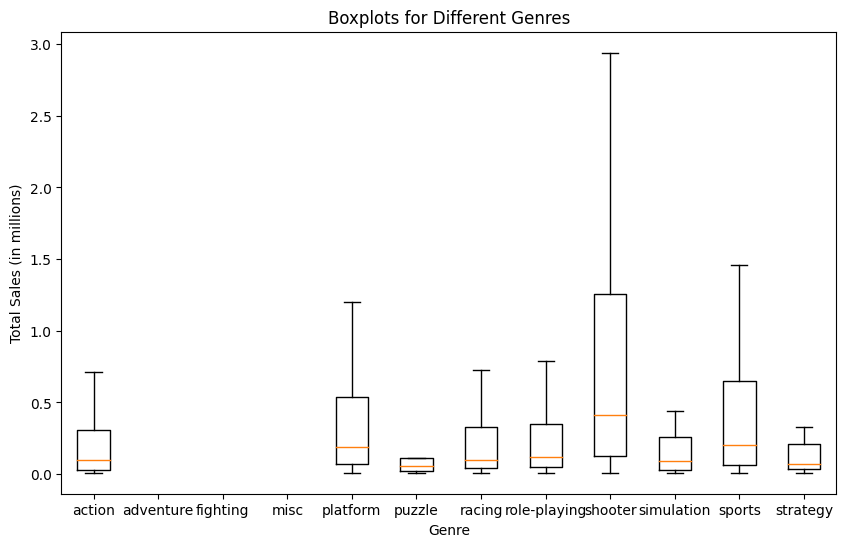

In [24]:
#create boxplots for the differents genres to see the spread
action = games[games['genre']=='action']
adventure = games[games['platform']=='adventure']
fighting = games[games['platform']=='fighting']
misc = games[games['platform']=='misc']
platform = games[games['genre']=='platform']
puzzle= games[games['genre']=='puzzle']
racing= games[games['genre']=='racing']
role_playing= games[games['genre']=='role-playing']
shooter= games[games['genre']=='shooter']
simulation= games[games['genre']=='simulation']
sports= games[games['genre']=='sports']
strategy= games[games['genre']=='strategy']

#combine for boxplot
data_for_boxplot_genre = [action['total_sales'], adventure['total_sales'], fighting['total_sales'], misc['total_sales'], platform['total_sales'], puzzle['total_sales'], racing['total_sales'], role_playing['total_sales'], shooter['total_sales'], simulation['total_sales'], sports['total_sales'], strategy['total_sales']]


#create boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(data_for_boxplot_genre, labels=['action', 'adventure', 'fighting', 'misc', 'platform', 'puzzle', 'racing', 'role-playing', 'shooter', 'simulation', 'sports', 'strategy'], showfliers= False)
plt.title('Boxplots for Different Genres')
plt.xlabel('Genre')
plt.ylabel('Total Sales (in millions)')

plt.show()

If we are looking at total sales, alone, it would seem that the two genres that have the most games released, action and sports games, also have the highest sales. However when looking more closely at the spread of the data and exluding any extreme outliers, it seems that generally platform and shooter games have the highest median values and highest maximum sales. 

## Create a User Profile for Each Region

The top five genres. Explain the difference.
Do ESRB ratings affect sales in individual regions?


platform  na_sales
4       ps4    108.74
10     xone     93.12
9      x360     81.66
3       ps3     63.50
0       3ds     38.20

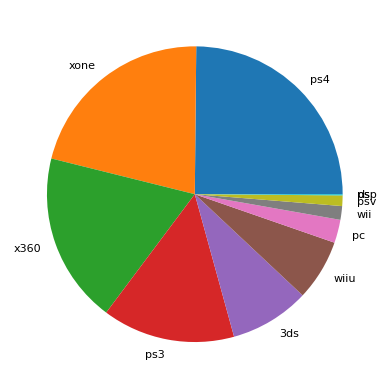

platform  eu_sales
4       ps4    141.09
3       ps3     67.81
10     xone     51.59
9      x360     42.52
0       3ds     30.96

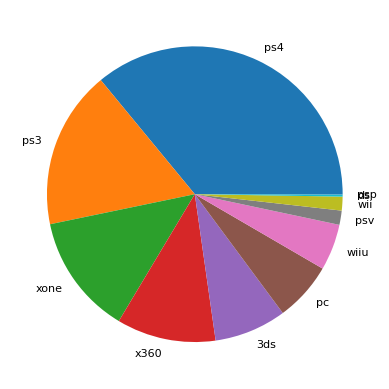

platform  jp_sales
0      3ds     67.81
3      ps3     23.35
6      psv     18.59
4      ps4     15.96
8     wiiu     10.88

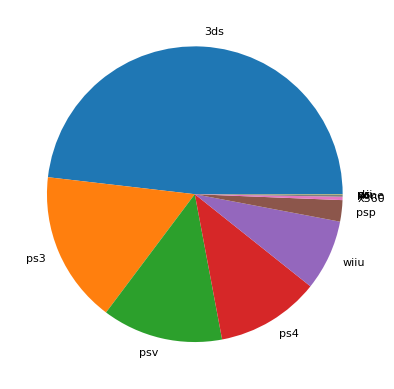

In [25]:
#find the top five platforms for each region based on sales in said region
#sales per platform for North America
na_platform_sales = games.groupby('platform')['na_sales'].sum().reset_index()
#sort results in descending order
na_platform_sales= na_platform_sales.sort_values(by='na_sales', ascending=False)
display(na_platform_sales.head(5))
plt.pie(na_platform_sales['na_sales'], labels=na_platform_sales['platform'], textprops={'fontsize': 8})
plt.show()

#sales per platform for Europe
eu_platform_sales = games.groupby('platform')['eu_sales'].sum().reset_index()
#sort results in descending order
eu_platform_sales= eu_platform_sales.sort_values(by='eu_sales', ascending=False)
display(eu_platform_sales.head(5))
plt.pie(eu_platform_sales['eu_sales'], labels=eu_platform_sales['platform'], textprops={'fontsize': 8})
plt.show()

#sales per platform for Japan
jp_platform_sales = games.groupby('platform')['jp_sales'].sum().reset_index()
#sort results in descending order
jp_platform_sales= jp_platform_sales.sort_values(by='jp_sales', ascending=False)
display(jp_platform_sales.head(5))
plt.pie(jp_platform_sales['jp_sales'], labels=jp_platform_sales['platform'], textprops={'fontsize': 8})
plt.show()

The top five platforms in North America are (from least to greatest) ds, ps3, wii, ps2, x360.
The top five platforms in Europe are (from least to greatest) ps, wii, x360, ps3, ps2.
The top five platforms in Japan are (from least to greatest) 3ds, snes, ps2, ps, ds.

The platform that showed high sales across all three regions is the ps2. It is interesting to note that of the newer systems being used in 2016, none of them are the top five platforms for any regions. ps systems are overall very successfull in sales at this time. 

In [26]:
#find the top five genres for each region based on sales in said region
#sales per genre for North America
na_genre_sales = games.groupby('genre')['na_sales'].sum().reset_index()
#sort results in descending order
na_genre_sales= na_genre_sales.sort_values(by='na_sales', ascending=False)
display(na_genre_sales.head(5))

#sales per genre for Europe
eu_genre_sales = games.groupby('genre')['eu_sales'].sum().reset_index()
#sort results in descending order
eu_genre_sales= eu_genre_sales.sort_values(by='eu_sales', ascending=False)
display(eu_genre_sales.head(5))

#sales per genre for Japan
jp_genre_sales = games.groupby('genre')['jp_sales'].sum().reset_index()
#sort results in descending order
jp_genre_sales= jp_genre_sales.sort_values(by='jp_sales', ascending=False)
display(jp_genre_sales.head(5))

genre  na_sales
0         action    126.05
8        shooter    109.74
10        sports     65.27
7   role-playing     46.40
3           misc     27.49

genre  eu_sales
0         action    118.13
8        shooter     87.86
10        sports     60.52
7   role-playing     36.97
6         racing     20.19

genre  jp_sales
7  role-playing     51.04
0        action     40.49
3          misc      9.20
2      fighting      7.65
8       shooter      6.61

For both North America and Europe, sports and action are the genres with the highest grossing sales. In Japan they are spots 2&3, with role playing games in the forefront. Miscenllaneous games also are in the top five genres for each region, as aligns with overall release and sale data. Shooter and platform games also appear on the top five list of two regions.

In [27]:
#do ESRB ratings affect sales in individual regions?
#groupby by rating
games_rating = games.groupby('rating').size().reset_index(name='count')
display(games_rating)
#create graph
#fig= px.bar(games_genre, x='genre', y='count', title='Number of Games Released per Genre')
#fig.update_layout(xaxis_title='genre', yaxis_title='Number of Games Released')
#fig.show()

rating  count
0      e    302
1   e10+    252
2      m    369
3      t    333

In [28]:
#group by rating and total the sales for each rating for North America
na_rating_sales = games.groupby('rating')['na_sales'].sum().reset_index()
#sort results in descending order
na_rating_sales= na_rating_sales.sort_values(by='na_sales', ascending=False)
display(na_rating_sales)

#group by rating and total the sales for each rating for Europe
eu_rating_sales = games.groupby('rating')['eu_sales'].sum().reset_index()
#sort results in descending order
eu_rating_sales= eu_rating_sales.sort_values(by='eu_sales', ascending=False)
display(eu_rating_sales)

#group by rating and total the sales for each rating
jp_rating_sales = games.groupby('rating')['jp_sales'].sum().reset_index()
#sort results in descending order
jp_rating_sales= jp_rating_sales.sort_values(by='jp_sales', ascending=False)
display(jp_rating_sales)

rating  na_sales
2      m    165.21
0      e     79.05
1   e10+     54.24
3      t     49.79

rating  eu_sales
2      m    145.32
0      e     83.36
1   e10+     42.69
3      t     41.95

rating  jp_sales
3      t     20.59
0      e     15.14
2      m     14.11
1   e10+      5.89

In all three regions, e, m, and t are all the ratings that produce the highest sales. However it is hard to say if that is because they are the ones that are produced more or because they are the ones that are more well recieved.

## Testing Hypothesis

Но-Average user ratings of the Xbox One and PC platforms are the same. 

Н1—Average user ratings for the Action and Sports genres are different.

*I am choosing to set alpha at 0.05 for both of these tests because it is a commonly used threshold.

For the Hypothesis: Average user ratings of the Xbox One and PC platforms are the same.

This will use a t-test to compare two different population means

H0 = user ratings for xone = user ratings for PC platforms: because null hypothesis always suggest equality
H1 = user ratings for xone <> user ratings for PC platforms

In [29]:
#isolate populations that are being compared
xone = games[games['platform'] == 'xone']['user_score']
pc = games[games['platform'] == 'pc']['user_score']

#remove missing values 
xone_clean = xone.dropna()
pc_clean = pc.dropna()

#obtain general statistics about populations
display(xone_clean.describe())
display(pc_clean.describe())

#set alpha value
alpha=0.05

#perform t-test
results = st.ttest_ind(xone_clean, pc_clean)

#print results
print("T-statistic:", results.statistic)
print("P-value:", results.pvalue)

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

count    155.000000
mean       6.269677
std        1.742381
min        1.400000
25%        5.300000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

T-statistic: 1.4788255981357277
P-value: 0.14012658403611647


These results indicate that xone and pc ratings differ signifigantly and the xone group has lower ratings than the pc group.

There is a statistically signifigant difference between the mean of both groups. The null hypothesis is rejected in this instance. 

For the Hypothesis: Average user ratings for the Action and Sports genres are different.

This will use a t-test to compare two different population means

H0 = user ratings for action = user ratings for sports
H1 = user ratings for action <> user ratings for sports: alternative hypothesis because this hypothesis suggests signifigant differences between two population means

In [30]:
#isolate populations that are being compared
action = games[games['genre'] == 'action']['user_score']
sports = games[games['genre'] == 'sports']['user_score']

#remove missing values 
action_clean = action.dropna()
sports_clean = sports.dropna()

#obtain general statistics about populations
display(action_clean.describe())
display(sports_clean.describe())

#set alpha value
alpha=0.05

#perform t-test
results = st.ttest_ind(action_clean, sports_clean)

#print results
print("T-statistic:", results.statistic)
print("P-value:", results.pvalue)

count    389.000000
mean       6.837532
std        1.330173
min        2.000000
25%        6.300000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

count    160.000000
mean       5.238125
std        1.783427
min        0.200000
25%        4.100000
50%        5.500000
75%        6.500000
max        8.800000
Name: user_score, dtype: float64

T-statistic: 11.535100577928208
P-value: 1.0517832389140023e-27


These results indicate that action and sports ratings differ moderately and the action group has higher ratings than the sports group.

Since the p value is greater than 0.05, we fail to reject the null hypothesis meaning that the difference is not statistically signifigant. 

## General Conclusion

The goal of this analysis is to help develop advertising campaigns ans strategies for Ice's 2017 campaign. Using this information, it is important to look at how long games and gaming systems stay in popularity, which types of games are popular, and targeting potential markets that might not have been given enough attention.

This analysis found that gaming platforms tend to be popular for up to 5 years. Therefore one might benefit from targeting games coming out on newer platforms as older ones phase out such as Xbox One, PS4, PS5, and Wiiu. Gearing games towards these systems could help increase their popularity and target trends that are on the rise.

While action and sports games grossed the overall highest sales, platform games and shooter games had the highest median values and highest maximum values for all genres. This sugg

It should also be noted that action, sports, and miscellaneous games tended to be popular across all three regions studied. However these games also are being released at a higher rate. Potentially tapping into other gaming types that also showed promise such as shooter and platform games could increase overall profits on top of genres that are already successful. 

Lastly, evidence is not showing a strong correlation between user scores and total sales. This is a tool with potential for growth. If user scores could be advertised or pushed out in a new way, they could act as low maintenance marketing or quick market research.

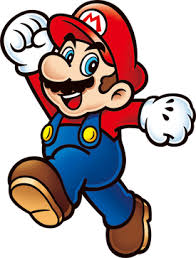